# Simple linear regerssion with R

Based on:
http://r-statistics.co/Linear-Regression.html

## Dataset

`cars`

In [1]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


## Data exploration

### Scatter plot

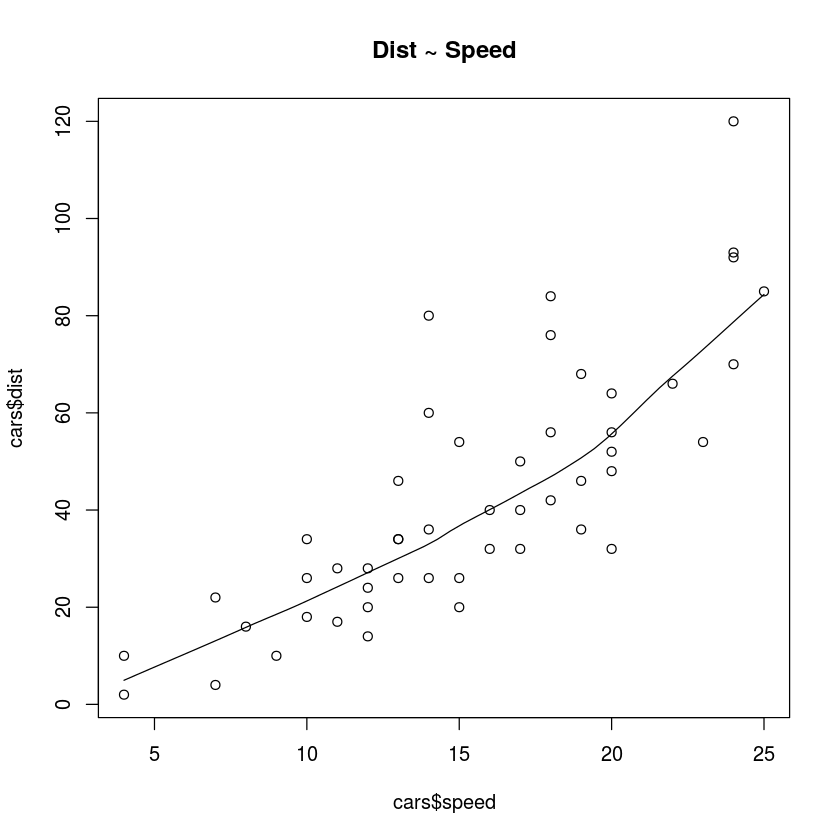

In [2]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")

### Box plot

In [19]:
?boxplot

In [32]:
?boxplot.stats

#### IQR = Interquartile range

\begin{equation}
    IQR(x)
    =
    quantile(x, 3/4) - quantile(x, 1/4)
\end{equation}

In [9]:
quantile(cars$dist, c(1,3)/4)

25% 75% 
 26  56

In [18]:
stats::IQR(cars$dist)

[1] 30

In [14]:
?stats::IQR

In [60]:
dist_stats <- boxplot.stats(cars$dist)
dist_stats

$stats
[1]  2 26 36 56 93

$n
[1] 50

$conf
[1] 29.29663 42.70337

$out
[1] 120

In [61]:
dist_stats$stats

[1]  2 26 36 56 93

#### Boxplot: hinges

The two ‘hinges’ are versions of the first and third quartile, i.e., close to quantile(x, c(1,3)/4). The hinges equal the quartiles for odd n (where n <- length(x)) and differ for even n. Whereas the quartiles only equal observations for n %% 4 == 1 (n = 1 mod 4), the hinges do so additionally for n %% 4 == 2 (n = 2 mod 4), and are in the middle of two observations otherwise.

In [52]:
distance_lower_hinge <- quantile(cars$dist, 1/4)
distance_lower_hinge

25% 
 26

In [53]:
distance_upper_hinge <- quantile(cars$dist, 3/4)
distance_upper_hinge

75% 
 56

#### Boxplot: whiskers

In [57]:
distance_med <- median(cars$dist)
distance_med

[1] 36

In [58]:
distance_IQR <- stats::IQR(cars$dist)
distance_IQR

[1] 30

In [59]:
distance_upper_whisker <- distance_upper_hinge + 1.5*distance_IQR
distance_upper_whisker

75% 
101

#### Boxplot: Notches

The notches (if requested) extend to +/-1.58 IQR/sqrt(n). This seems to be based on the same calculations as the formula with 1.57 in Chambers et al (1983, p. 62), given in McGill et al (1978, p. 16). They are based on asymptotic normality of the median and roughly equal sample sizes for the two medians being compared, and are said to be rather insensitive to the underlying distributions of the samples. The idea appears to be to give roughly a 95% confidence interval for the difference in two medians.

In [30]:
n <- length(cars$dist)
n

[1] 50

In [31]:
IQR/sqrt(n)

[1] 4.242641

notches

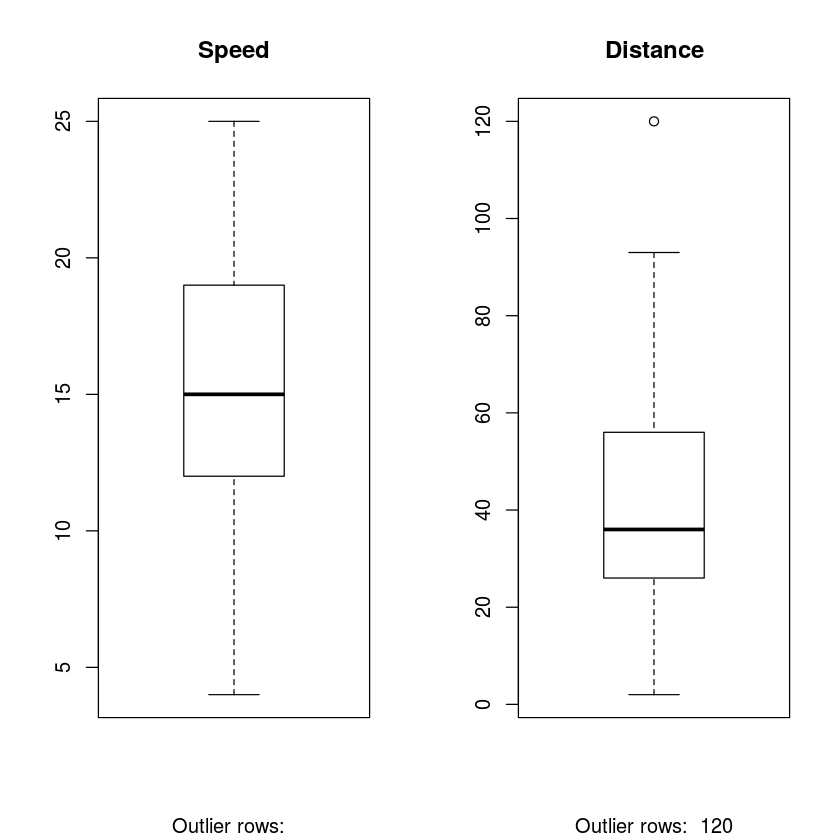

In [3]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns
boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'
boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance'

### Density plot

In [62]:
library(e1071)
par(mfrow=c(1, 2))  # divide graph area in 2 columns
plot(density(cars$speed), main="Density Plot: Speed", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))  # density plot for 'speed'
polygon(density(cars$speed), col="red")
plot(density(cars$dist), main="Density Plot: Distance", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))  # density plot for 'dist'
polygon(density(cars$dist), col="red")

ERROR: Error in library(e1071): there is no package called ‘e1071’


### Correlation

In [63]:
cor(cars$speed, cars$dist)

[1] 0.8068949

## Linear regression

Given dataset: ${y_{i}, x_{1}, x_{2}, ..., x_{n}}$

### Model

\begin{equation}
    y_{i} = \alpha + \beta x_{i} + \epsilon_{i}
\end{equation}

where
- $y_{i}$: dependent variable
- $\alpha$: intercept term
- $x_{i}$: independent variable
- $\beta$: coefficient

$t$ statistic generally:

\begin{equation}
    \frac{\bar{x}-\mu_{0}}{\frac{s}{\sqrt{n}}}
\end{equation}

where
- $\hat{x}$: best fit from sample
- $x_{0}$: hypothesized true value of the parameter
- $s$: standard deviation of $\hat{x}$


In case of linear regression with:
- $H_{0}$: there is no correlation between $y$ and 

In [38]:
linearMod <- lm(dist ~ speed, data=cars)
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



In [39]:
modelSummary <- summary(linearMod)
modelSummary


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [40]:
modelCoeffs  <- modelSummary$coefficients  # model coefficients
modelCoeffs

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-17.579095,6.7584402,-2.601058,1.231882e-02
speed,3.932409,0.4155128,9.463990,1.489836e-12


In [41]:
beta.estimate <- modelCoeffs["speed", "Estimate"]
beta.estimate

[1] 3.932409

In [42]:
std.error <- modelCoeffs["speed", "Std. Error"]
std.error

[1] 0.4155128

\begin{equation}
    t
    =
    \frac{\hat{\beta}-\beta_{H_{0}}}{\sigma_{\hat{\beta}}}
    =
    \frac{\hat{\beta}-0}{\sigma_{\hat{\beta}}}
    =
    \frac{\hat{\beta}}{\sigma_{\hat{\beta}}}
\end{equation}

In [43]:
t_value <- beta.estimate/std.error
t_value

[1] 9.46399

### `pt()` documentation

**The Student t Distribution**

**Description**

Density, distribution function, quantile function and random generation for the t distribution with `df` degrees of freedom (and optional non-centrality parameter `ncp`).

**Usage:**
~~~~
dt(x, df, ncp, log = FALSE)
pt(q, df, ncp, lower.tail = TRUE, log.p = FALSE)
qt(p, df, ncp, lower.tail = TRUE, log.p = FALSE)
rt(n, df, ncp)
~~~~

**Arguments:**
- `x`, `q`: vector of quantiles.
- `p`: vector of probabilities.
- `n`:	 number of observations. If length(n) > 1, the length is taken to be the number required.
- `df`:	 degrees of freedom (> 0, maybe non-integer). `df= Inf` is allowed.
- `ncp`: non-centrality parameter delta; currently except for rt(), only for abs(ncp) <= 37.62. If omitted, use the central t distribution.
- `log`, `log.p`: logical; if TRUE, probabilities p are given as log(p).
- `lower.tail`: logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x].

**Value**

`dt` gives the density, `pt` gives the distribution function, `qt` gives the quantile function, and `rt` generates random deviates.

Invalid arguments will result in return value NaN, with a warning.

The length of the result is determined by `n` for `rt`, and is the maximum of the lengths of the numerical arguments for the other functions.

The numerical arguments other than n are recycled to the length of the result. Only the first elements of the logical arguments are used.

In [44]:
?pt

\begin{equation}
    \text{p-value}
    = 
    2 ~ CDF_{\text{t-statistic}}[-t, df=n_{samples}-n_{par}]
\end{equation}

### p-value

In [45]:
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))
p_value

[1] 1.489836e-12

In [50]:
linearMod


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


In [52]:
f <- summary(linearMod)$fstatistic  # parameters for model p-value calc
f

value    numdf    dendf 
89.56711  1.00000 48.00000

In [24]:
model_p <- pf(f[1], f[2], f[3], lower=FALSE)
model_p

value 
1.489836e-12

### $R^{2}$ (coefficient of determination)

Proportion of the variance in the dependent variable that is predictable from the independent variable(s).

\begin{equation}
    R^{2}
    =
    1 - \frac{\sum_{i} (y_{i} - \hat{y}_{i})^{2} }{ \sum_{i} (y_{i} - \bar{y})^{2}}
\end{equation}


\begin{equation}
    R^{2}
    =
    1 - FVU
\end{equation}

$FVU$: fraction of unexplained variance

\begin{equation}
    FVU
    =
    \frac{\sum_{i} (y_{i} - \hat{y}_{i})^{2} }{ \sum_{i} (y_{i} - \bar{y})^{2}}
\end{equation}

\begin{equation}
    R^{2}
    =
    FVE
\end{equation}

$FVU$: fraction of explained variance

Features of $R^{2}$:
- adding more $\beta_{i} X_{i}$ pairs decreases the unexplained variance through better (over)fitting which increases $R^{2}$

### $R^{2}_{adj}$ (adjusted $R^{2}$)

\begin{equation}
    R^{2}_{adj}
    =
    1
    -
    \frac{ \frac{\sum_{i} (y_{i} - \hat{y}_{i})^{2}}{n-1} }
    { \frac{\sum_{i} (y_{i} - \bar{y})^{2}}{n-1}  }
\end{equation}

where
- $n$: number of observations
- $q$: number of coefficients

### AIC (Akaike's information criterion)

\begin{equation}
    AIC = -2 \log \mathcal{L}_{max} + 2 ~ k
\end{equation}

where
- $\mathcal{L}$: likelihood function
- $k$: number of model parameters

In [55]:
?AIC

In [54]:
aic <- AIC(linearMod)
aic

[1] 419.1569

### BIC (Bayesian information criterion)

\begin{equation}
    BIC
    =
    -2 \log \mathcal{L}_{max} + k \log n
\end{equation}

where
- $\mathcal{L}$: likelihood function
- $k$: number of model parameters
- $n$: sampe size

In [56]:
?BIC

In [57]:
bic <- BIC(linearMod)
bic

[1] 424.8929